<a href="https://colab.research.google.com/github/screemix/practical-deep-learning/blob/main/Assignment_1_Content_based_image_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

**Content-Based Image Retrieval**


Similar Image Retrieval (aka Content-Based Image Retrieval or CBIR) is any search that involves images.
Nowadays the "Search by photo" approach is being used more and more actively, in particular, in e-commerce services (AliExpress, Wildberries, etc.). "Keyword search" (with an understanding of the content of images) has long settled in the search engines Google, Yandex, etc.,

**How does it work ?**


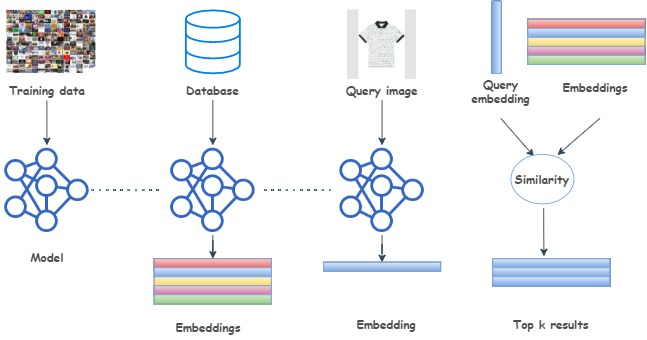


As you can see the pipeline seems easy. First we need a dataset, in this assignment we will be using a large scale benchmark dataset called the Inshop dataset (use the one provided in the link ;) ). The dataset contains training set and testing set. The testing set is divided into two parts query images and gallery images. The query set basically contains images that we will be searching for in the gallery set.


 
**Steps:**
1. Download the dataset 
2. Read the dataset and put it in an appropriate format 
3. Choose a model (you can use pretrained ;) ) and train it
4. Wisely choose a loss function in deep metric learning there are many such as : Contrastive loss, Triplet loss, multi similarity loss, XBM .... Implement one of them. 
5. Measure the scores using the recall metric
6. Report results ( recall values , loss) using tensorboard or Comet or any tool you are comfortable with.  


**Bonus tasks**



1.   Use of hard negative miner (15 points)
2.   Use of PytorchLightening (10 points)




In [ ]:
import os
import torch
import time
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, models
import numpy as np
import torchvision
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl

## Read data

In [ ]:
### PUT YOU CODE HERE ###

"""
Tips : 
    1- For better performance use CenterCrop of size (200,200)
    2- To optimize your code use torchvision.datasets.ImageFolder the dataset provided is already structured 
    3- You can use subset of the dataloader torch.utils.data.Subset in the beggining to test your code then the whole dataset
""" 




## Model & loss function

In [ ]:
def set_parameter_requires_grad(model):
  for param in model.parameters():
      param.requires_grad = False

input_size = 224

model_ft = models.resnet18(pretrained=True)
set_parameter_requires_grad(model_ft)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 1024)

model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
class Model(pl.LightningModule):
  def __init__(self):
    super(Model, self).__init__()
    self.res_net = model_ft

    def forward(self, input1, input2):
        output1 = self.res_net(input1)
        output2 = self.res_net(input2)
        return output1, output2

In [ ]:
def loss_function(x1, x2):
    pdist = nn.PairwiseDistance(p=2)
    dist = pdist(x1, x2)
    margin = 1

    mdist = torch.relu(margin - dist, 0)
    loss = (y * torch.pow(dist, 2) + (1 - y) * torch.pow(mdist, 2)) / 2.0 
    loss = torch.sum(loss)  / x1.size()[0]
    return loss

## Train Test

In [ ]:
### PUT YOU CODE HERE ###

def train():
    """ Implement your training function """
    return ""

def test():
    """ Implement your testing function """
    return ""

### Recall metric

In [ ]:
class RecallMetric(object):
    def __init__(self, feats, labels):

        """
         This function calculates the recall metric 

         feats = [gallery_embeddings, query_embeddings]
         labels = [gallery_labels, query_labels]
        """
        self.is_equal_query = False
        self.gallery_feats, self.query_feats = feats
        self.gallery_labels, self.query_labels = labels
        self.sim_mat = np.matmul(self.query_feats, np.transpose(self.gallery_feats))

    def recall_at_k(self, k=1):
        m = len(self.sim_mat)
        match_counter = 0
        for i in range(m):
            pos_sim = self.sim_mat[i][self.gallery_labels == self.query_labels[i]]
            neg_sim = self.sim_mat[i][self.gallery_labels != self.query_labels[i]]
            thresh = np.sort(pos_sim)[-2] if self.is_equal_query else np.max(pos_sim)
            if np.sum(neg_sim > thresh) < k:
                match_counter += 1
        return float(match_counter) / m

In [ ]:
### Define Model, optimizer, scheduler and loss function

In [ ]:
for epoch in range(1, params["epochs"] + 1):
    
    ### PUT YOUR CODE HERE ### 

    print("Recall@1 : {:.4f} Recall@5 : {:.4f} Recall@10 : {:.4f}".format(recall_at_1,recall_at_5,recall_at_10))



## visualization 


Use a retrieval technique like KNN, annoy, KD-tree (you are free to choose). 

Plot 3 query images with their respective top 5 results 



In [ ]:
    ### PUT YOUR CODE HERE ### 


**Important notes **

1. Deadline is ** 7th september at 10 AM**
2. Cheating is prohibited 